# Import Dependencies, Data & take first look

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Outliers Analysis

Make sure Very high Engine HP values are not outliers

In [6]:
data[data['Engine HP'] > 500]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
471,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,239340
472,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,263553
473,Ferrari,458 Italia,2015,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,291744
604,McLaren,570S,2016,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,23,16,416,184900
605,Ferrari,575M,2002,premium unleaded (required),515.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,214670


Check which car has 354 mpg and 137 mpg highway and city mileage respectively (These values are crazily high)

In [7]:
data[data['highway MPG'] == 354]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [8]:
data[data['city mpg'] == 137]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400


The 354 highway mpg clearly looks insane for Audi A6 as it's city mpg is 24. Let's analyze other Audi A6 cars from 2017 to check what's their highway mileage. It could be that instead of 354, the true mpg is 35.4

In [9]:
data[(data['Make'] == 'Audi') & (data['Model'] == 'A6') & (data['Year'] == 2017)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1114,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,22,3105,53800
1115,Audi,A6,2017,premium unleaded (required),333.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,31,22,3105,61600
1116,Audi,A6,2017,premium unleaded (required),340.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,31,22,3105,67600
1117,Audi,A6,2017,premium unleaded (required),333.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,29,21,3105,58600
1118,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,32,22,3105,49800
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1120,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,34,24,3105,47600


So, it's definitely is an outlier and we will change the value from 354 to 35.4 based on other records

In [0]:
data.at[1119, 'highway MPG'] = 35.4

In [11]:
data.iloc[1119]

Make                                           Audi
Model                                            A6
Year                                           2017
Engine Fuel Type     premium unleaded (recommended)
Engine HP                                       252
Engine Cylinders                                  4
Transmission Type                  AUTOMATED_MANUAL
Driven_Wheels                     front wheel drive
Number of Doors                                   4
Market Category                              Luxury
Vehicle Size                                Midsize
Vehicle Style                                 Sedan
highway MPG                                      35
city mpg                                         24
Popularity                                     3105
MSRP                                          51600
Name: 1119, dtype: object

Same check for BMW i3 for city mpg of 137

In [12]:
data[(data['Make'] == 'BMW') & (data['Model'] == 'i3') & (data['Year'] >= 2015)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5793,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,106,129,3916,43600


Upon further research found out that BMW i3 has greater city mpg than highway mpg

# Missing values analysis

In [0]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
    return mz_table

In [14]:
missing_zero_values_table(data)

Your selected dataframe has 16 columns and 11914 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
Market Category,0,3742,31.4,object
Engine HP,0,69,0.6,float64
Engine Cylinders,56,30,0.3,float64
Number of Doors,0,6,0.1,float64
Engine Fuel Type,0,3,0.0,object


Let's analyze these variables one by one to check if missing data is random or because of any reason

In [15]:
data[data['Engine HP'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,26850


In [16]:
data[data['Number of Doors'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [17]:
data[data['Engine Cylinders'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [18]:
data[data['Engine Fuel Type'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


Functions to handle missing values

In [0]:
def handle_missing_doors(df):
    for idx, row in df.iterrows():
        if pd.isnull(row['Number of Doors']):
            value = mode(df[(df['Model']==row['Model']) & 
                        (df['Make']==row['Make']) & 
                        (df['Year']==row['Year'])]['Number of Doors'])
            if pd.isnull(value):
                df.at[idx, 'Number of Doors'] = 4
            else:
                df.at[idx, 'Number of Doors'] = value
            

def handle_missing_fuel_type(df):
    for idx, row in df.iterrows():
        if pd.isnull(row['Engine Fuel Type']):
            try:
                value = mode(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine Fuel Type'])
            except Exception as e:
                value = np.mean(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine Fuel Type'])
            if pd.isnull(value):
                df.at[idx, 'Engine Fuel Type'] = 'NA'
            else:
                df.at[idx, 'Engine Fuel Type'] = value
            
            
def handle_missing_eng_cyl(df):
    for idx, row in df.iterrows():
        if pd.isnull(row['Engine Cylinders']):
            try:
                value = mode(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine Cylinders'])
            except Exception as e:
                value = np.mean(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine Cylinders'])
            if pd.isnull(value):
                df.at[idx, 'Engine Cylinders'] = 0
            else:
                df.at[idx, 'Engine Cylinders'] = value
                
                
def handle_missing_eng_hp(df):
    for idx, row in df.iterrows():
        if pd.isnull(row['Engine HP']):
            try:
                value = mode(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine HP'])
            except Exception as e:
                value = np.mean(df[(df['Model']==row['Model']) & 
                               (df['Make']==row['Make']) & 
                              (df['Year']==row['Year'])]['Engine HP'])
            if pd.isnull(value):
                df.at[idx, 'Engine HP'] = 0
            else:
                df.at[idx, 'Engine HP'] = value

In [0]:
handle_missing_doors(data)
handle_missing_eng_cyl(data)
handle_missing_eng_hp(data)
handle_missing_fuel_type(data)

Drop the Market Category Column as it has lot of NANs (31.4%)

In [0]:
data.drop('Market Category', axis=1, inplace=True)

Let's do sanity checks to verify all went well

In [22]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,248.365117,5.614655,3.436377,26.610710,19.733255,1554.911197,4.059474e+04
std,7.579740,110.023455,1.800554,0.881184,8.340396,8.987798,1441.855347,6.010910e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06


In [23]:
missing_zero_values_table(data)

Your selected dataframe has 15 columns and 11914 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type


So all worked well in handling the missing values. Now lets move on to some visualization to get better feel of relationship of different variables with the price

# Visualization

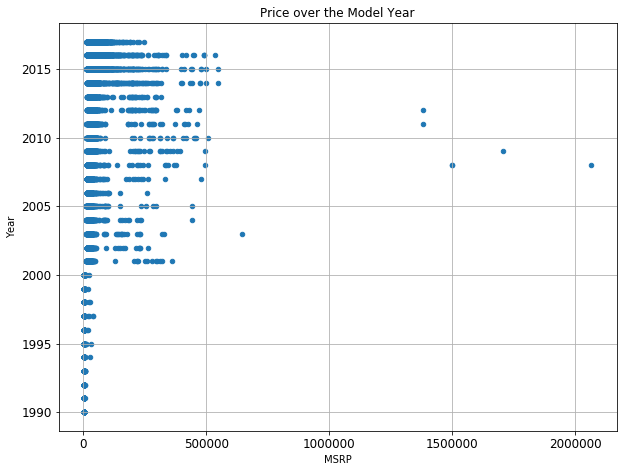

In [24]:
data.plot(x='MSRP', y='Year', kind='scatter', figsize=(10, 7.5), title='Price over the Model Year', grid=True, fontsize=12)
plt.show()

Let's analyze models with price > 1000000

In [25]:
data[data['MSRP'] > 1000000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6350,Maybach,Landaulet,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Convertible,16,10,67,1380000
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,Large,Convertible,16,10,67,1382750
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,9,1158,1500000
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,1705769


So, these are just luxurious sports cars, not any outliers

Also, new cars have high prices generally.

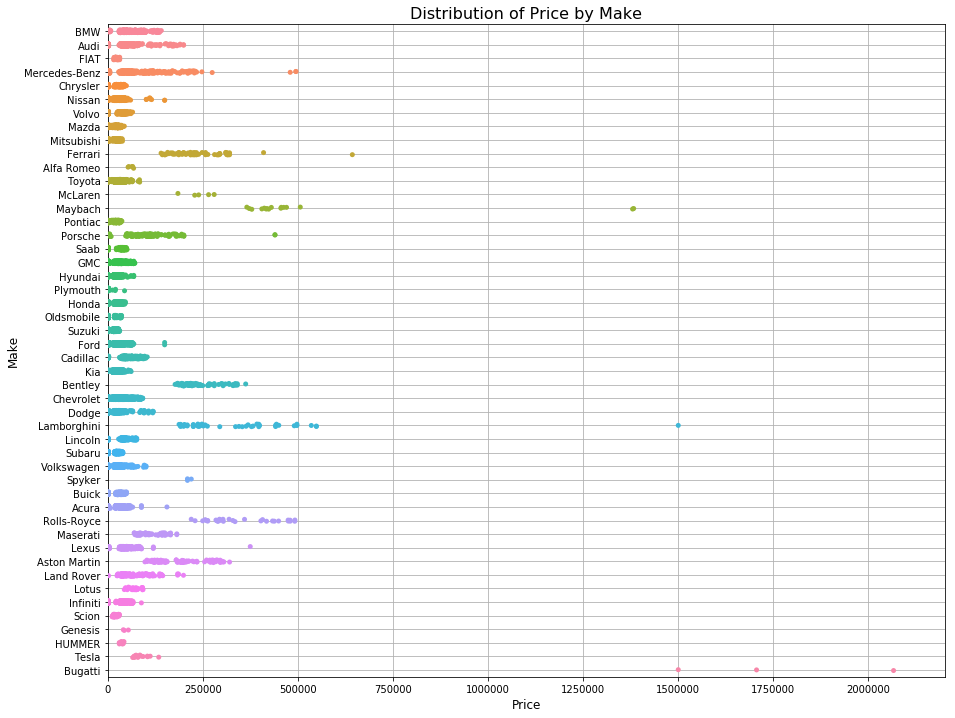

In [26]:
fig = plt.figure(figsize=(15, 12))
sns.stripplot(data=data, x='MSRP', y='Make', jitter=0.1, size=5)
plt.xlim(0, 2200000)
plt.xlabel('Price', size=12)
plt.ylabel('Make', size=12)
plt.title('Distribution of Price by Make', size=16)
plt.grid()
plt.show()

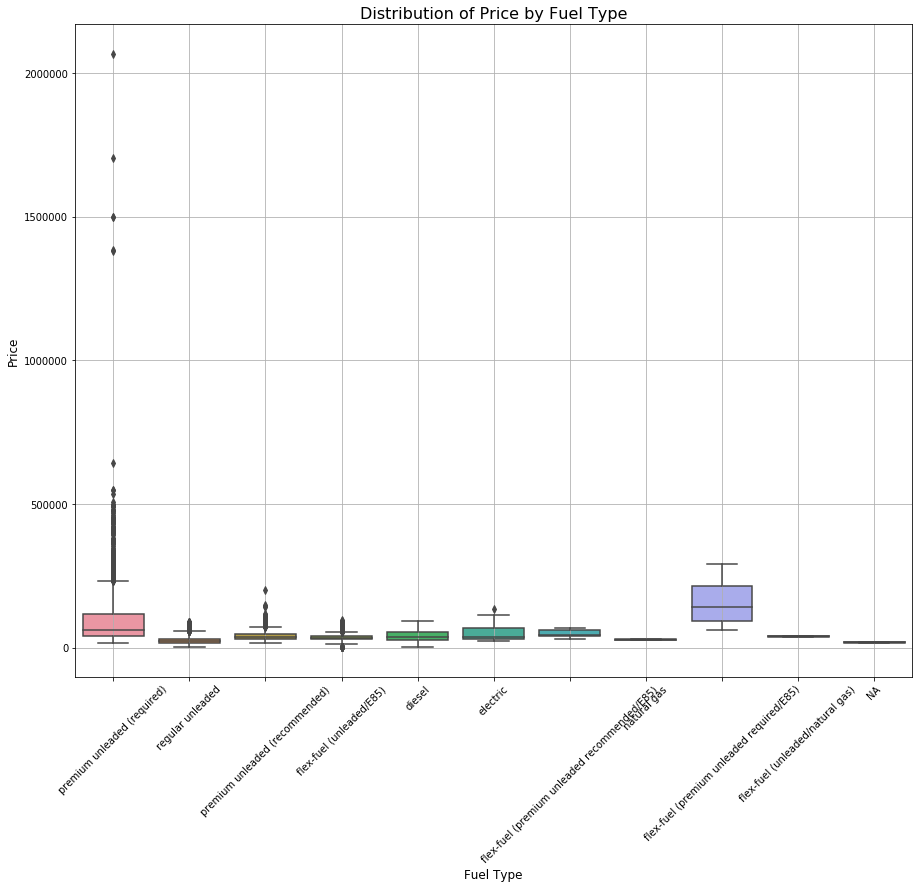

In [27]:
fig = plt.figure(figsize=(15, 12))
sns.boxplot(data=data, x='Engine Fuel Type', y='MSRP')
plt.xlabel('Fuel Type', size=12)
plt.xticks(rotation=45)
plt.ylabel('Price', size=12)
plt.title('Distribution of Price by Fuel Type', size=16)
plt.grid()
plt.show()

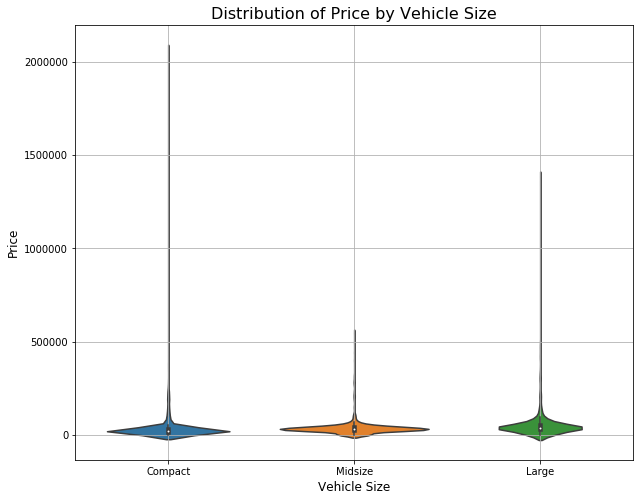

In [28]:
fig = plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='Vehicle Size', y='MSRP')
plt.xlabel('Vehicle Size', size=12)
plt.ylabel('Price', size=12)
plt.title('Distribution of Price by Vehicle Size', size=16)
plt.grid()
plt.show()

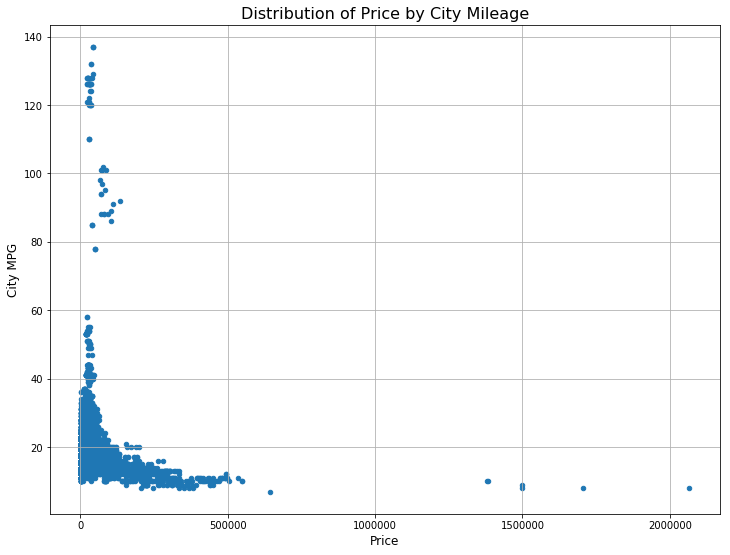

In [29]:
data.plot(x='MSRP', y='city mpg', kind='scatter', figsize=(12, 9), grid=True)
plt.xlabel('Price', size=12)
plt.ylabel('City MPG', size=12)
plt.title('Distribution of Price by City Mileage', size=16)
plt.show()

Cars with higher price ranges have less mileage

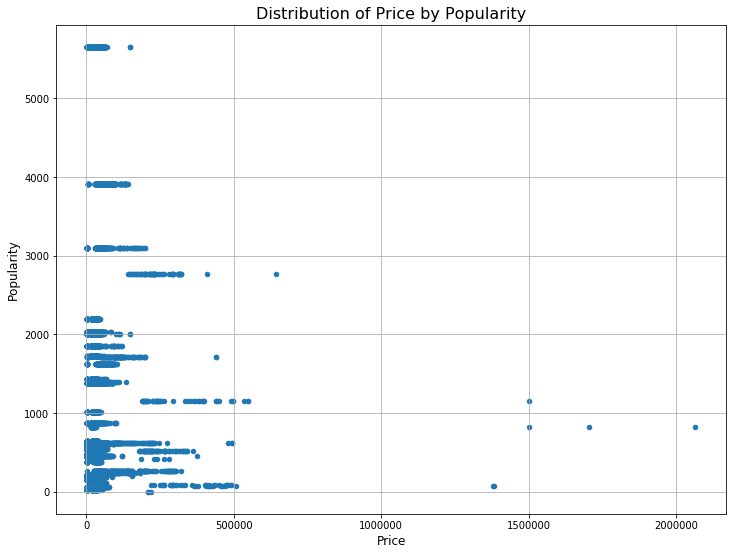

In [30]:
data.plot(x='MSRP', y='Popularity', kind='scatter', figsize=(12, 9), grid=True)
plt.xlabel('Price', size=12)
plt.ylabel('Popularity', size=12)
plt.title('Distribution of Price by Popularity', size=16)
plt.show()

Seems like cars with higher price range are less popular!

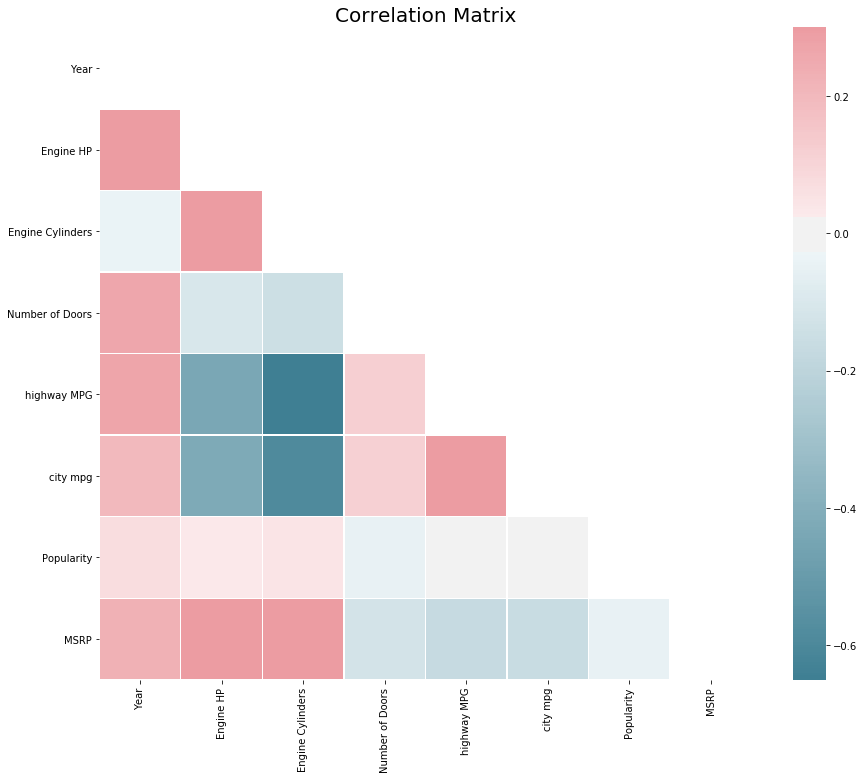

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig = plt.figure(figsize=(15,12))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmax=.3, center=0, square=True, linewidths=.5, cmap=cmap, mask=mask)
plt.title('Correlation Matrix', size=20)
plt.show()

# Feature Engineering

All of the features in data which remain play an important role in predicting the Price of the vehicle.
Still we need to convert categorical features into numerical features so that they can be used in our model

In [0]:
X = data.drop('MSRP', axis=1)
Y = data['MSRP']
X = pd.get_dummies(data=X)

Now let's get the train test split and save both sets in files to be used by our model in next phase

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [36]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
